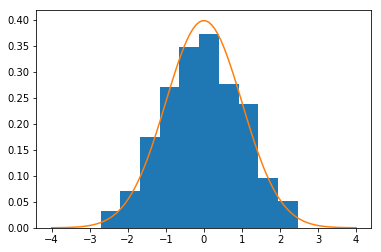

1.0420571647066992

In [11]:
# Solution to Exercise 4.1

import numpy as np
import matplotlib.pyplot as plt

L = 300
x = np.random.normal(size=L)
xv = np.linspace(-4,4,100)
plt.hist(x,bins=10,density=True) 
plt.plot(xv,1/np.sqrt(2*np.pi)*np.exp(-.5*xv**2))
plt.show()
np.mean(x)
np.var(x)

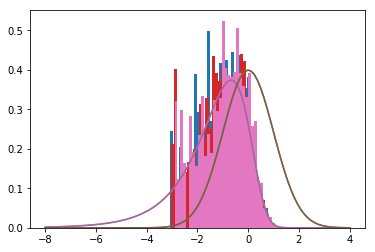

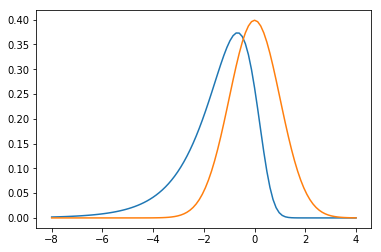

In [17]:
# Solution to Exercise 4.2
import numpy as np
import matplotlib.pyplot as plt

# target
def p(x):
    return np.sqrt(2)/np.sqrt(np.pi*(1+(x-1)**2))*np.exp(-.5*(3+2*np.arcsinh(x-1))**2)

# proposal
m=0 
s2 = 1

def q(x):
    return 1/np.sqrt(2*np.pi*s2)*np.exp(-((x-m)**2)/2/s2)

L = 1000 # number of samples
x = np.random.normal(size=L)*np.sqrt(s2)+m #draw from proposal 
w = p(x)/q(x) # compute weights

# plot a weighted histogram
plt.hist(x,weights=w,bins=50,density=True)
plt.show()

# plot the target distribution and the proposal
xv = np.linspace(-8,4,100)
plt.plot(xv,p(xv)) 
plt.plot(xv,q(xv))
plt.show()

# Estimate mean and variance
est_mean = np.sum(x*w)/L
est_var = np.sum(w*(est_mean-x)**2)/L

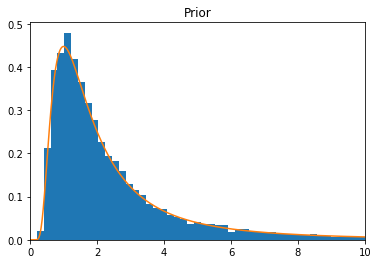

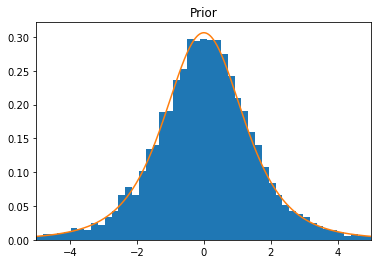

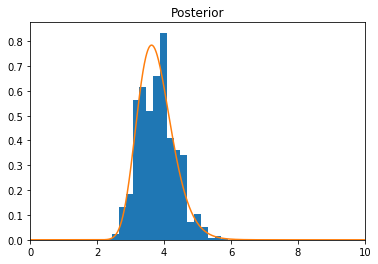

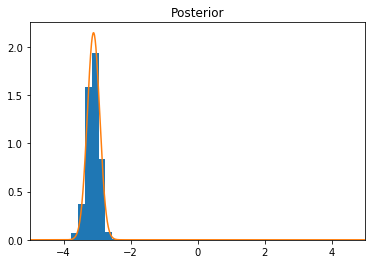

In [23]:
# Solution to Exercise 4.3

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgamma , t

m=0 
l=1
b=3 
a=2
N = 100
w0 = -3

X = np.random.normal(size=N)
y = X*w0 + np.random.normal(size=N)*2

# Analytical solution
s2v = np.linspace(0,10,1000) 
wv = np.linspace(-5,5,1000)

mpost = (m*l+np.sum(X*y))/(l+np.sum(X**2)) 
lpost = l + np.sum(X**2)
apost = a + N/2
bpost = b+.5*(np.sum(y**2)+m**2*l-(m*l+np.sum(X*y))**2/(l+np.sum(X**2)))

# Importance sampling
L = 10000
s2is = invgamma.rvs(size=L,a=a,scale=b)
plt.hist(s2is,density=True,bins=np.linspace(0,10,50)) 
plt.plot(s2v,invgamma.pdf(x=s2v,a=a,scale=b))
plt.xlim((0,10)) 
plt.title('Prior')
plt.show()

wis = np.random.normal(size=L)*np.sqrt(s2is/l)+m 
plt.hist(wis,density=True,bins=np.linspace(-5,5,50))
plt.plot(wv,t.pdf(x=wv,df=2*a,loc=m,scale=np.sqrt(b/(a*l)))) 
plt.xlim((-5,5))
plt.title('Prior') 
plt.show()

weightis = 1/np.sqrt(2*np.pi*s2is)**N*np.exp(-1/(2*s2is)*np.sum((X[:,np.newaxis]*wis[np.newaxis,:]-y[:,np.newaxis])**2,axis=0))
plt.hist(s2is,density=True,bins=np.linspace(0,10,50),weights=weightis) 
plt.plot(s2v,invgamma.pdf(x=s2v,a=apost,scale=bpost))
plt.xlim((0,10)) 
plt.title('Posterior')
plt.show()

plt.hist(wis,density=True,bins=np.linspace(-5,5,50),weights=weightis) 
plt.plot(wv,t.pdf(x=wv,df=2*apost,loc=mpost,scale=np.sqrt(bpost/(lpost*apost))))
plt.xlim((-5,5)) 
plt.title('Posterior')
plt.show()

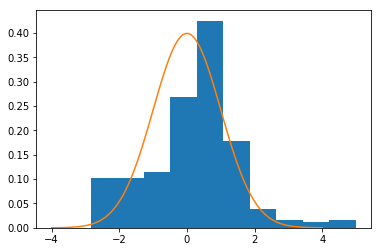

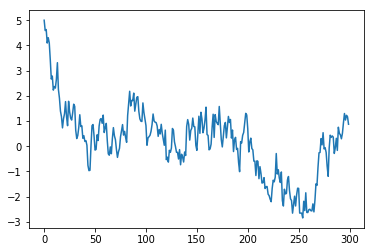

In [26]:
# Solution to Exercise 4.4
import numpy as np
import matplotlib.pyplot as plt

K = 300
x = np.zeros(K)
x[0] = 5

for k in range(K-1):
    x[k+1] = 0.9*x[k] + np.random.normal()*np.sqrt(0.19)
    
xv = np.linspace(-4,4,100) 
plt.hist(x,bins=10,density=True)
plt.plot(xv,1/np.sqrt(2*np.pi)*np.exp(-.5*xv**2)) 
plt.show()
np.mean(x)
np.var(x)
plt.plot(x) 
plt.show()

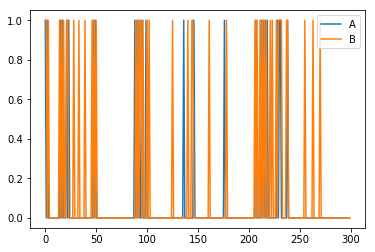

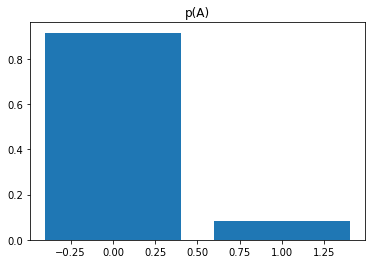

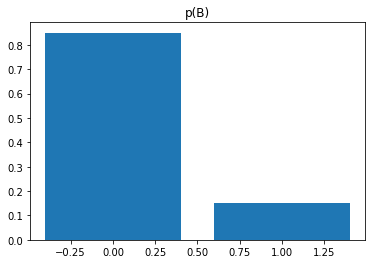

In [28]:
#Solution to Exercise 4.5
import numpy as np
import matplotlib.pyplot as plt

K = 300

A = np.zeros(K)
B = np.zeros(K)

A[0] = 1 # user-chosen initialization
B[0] = 1 # user-chosen initialization

for k in range(K-1):
    # Sample A given B
    if B[k]==0:
        A[k+1] = np.random.binomial(1,0.03/0.84)
    else:
        A[k+1] = np.random.binomial(1,0.07/0.16)

    # Sample B given A
    if A[k]==0:
        B[k+1] = np.random.binomial(1,0.1)
    else:
        B[k+1] = np.random.binomial(1,0.7)

plt.plot(A,label='A')
plt.plot(B,label='B') 
plt.legend(loc='upper right')
plt.show()
plt.bar(x=(0,1),height=(sum(1-A)/K,sum(A)/K)) 
plt.title('p(A)')
plt.show()
plt.bar(x=(0,1),height=(sum(1-B)/K,sum(B)/K))
plt.title('p(B)') 
plt.show()

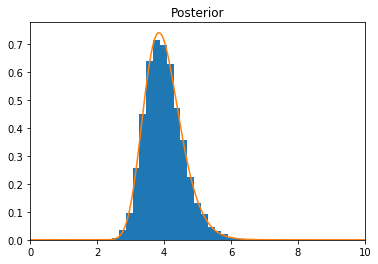

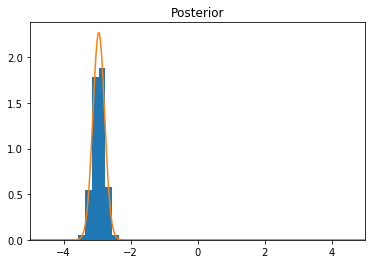

In [31]:
#Solution to Exercise 4.6

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgamma , t

m=0 
l=1
b=3 
a=2

N = 100
w0 = -3
X = np.random.normal(size=N)
y = X*w0 + np.random.normal(size=N)*2

# Analytical solution
s2v = np.linspace(0,10,1000)
wv = np.linspace(-5,5,1000)
mpost = (m*l+np.sum(X*y))/(l+np.sum(X**2))
lpost = l + np.sum(X**2) 
apost = a + N/2
bpost = b+.5*(np.sum(y**2)+m**2*l-(m*l+np.sum(X*y))**2/(l+np.sum(X**2)))

# Gibbs sampling
K = 10000
s2g = np.zeros(K) 
wg = np.zeros(K)
wg[0] = 0 
s2g[0] = 1

for k in range(K-1):
    wg[k+1] = np.random.normal()*np.sqrt(s2g[k]/(l+np.sum(X**2)))+(m*l+np.sum(X*y))/(l+np.sum(X**2))
    s2g[k+1] = invgamma.rvs(a=a+N/2+1/2,scale=b+1/2*np.sum((X*wg[k+1]-y)**2)+l/2*(wg[k+1]-m)**2)

plt.hist(s2g,density=True,bins=np.linspace(0,10,50))
plt.plot(s2v,invgamma.pdf(x=s2v,a=apost,scale=bpost)) 
plt.xlim((0,10))
plt.title('Posterior') 
plt.show()
plt.hist(wg,density=True,bins=np.linspace(-5,5,50))
plt.plot(wv,t.pdf(x=wv,df=2*apost,loc=mpost,scale=np.sqrt(bpost/(lpost*apost)))) 
plt.xlim((-5,5))
plt.title('Posterior') 
plt.show()